# Now that 0x0, 1x1, 0x2 are all in .py file as functions
can start testing the effects of varying the parameters. The parameters of interest to vary are
- $\alpha$, the amp map power, which has default value -3.0
- $\beta_0$, the SED power, which has default value -3.2
- $\gamma$, the power for the $C_\ell^{\beta\beta}$. Must be constrained to $\gamma<-2$ for convergence
- $\nu_0$, the freqency we do our Taylor expansion about. Current default is 2.3 GHz
- $A_s, A_\beta, \ell_*$ these are less interesting as they are degenerate with one another. We can probably leave $\ell_*=80$ and just vary the synch and beta amplitudes. 

In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [2]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term


#-------BB parameters (to start)--------
# A_BB = 1.7e3
# alpha_BB = -3.0
# beta_BB = -3.2
# beta_sigma = 1.5e-6

# A_beta = 1e-6
# gamma_BB = -2.1 #needs to be less than -2 for the 0x2 term to converge
# nu0 = 2.3e9

# #-------map paramters--------------------
# nside = 128
# Lmax = 3*nside
# ells = np.arange(0,Lmax)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(30,300,4)*1.e9

Populating the interactive namespace from numpy and matplotlib


In [53]:
%autoreload

In [4]:
#to do here
'''
write script to take in relevant arguments and then outputs all
the plots of the powerspectra overlayed with the 0x0--0x2 moments
at the relevant freqencies

plot residuals and see what's up

add in a parameter to the plots to do multiple realisations and plot the avg power spectrum we're trying to fit
could also put boolean optional parameter to overlay the multiple realisations
''';

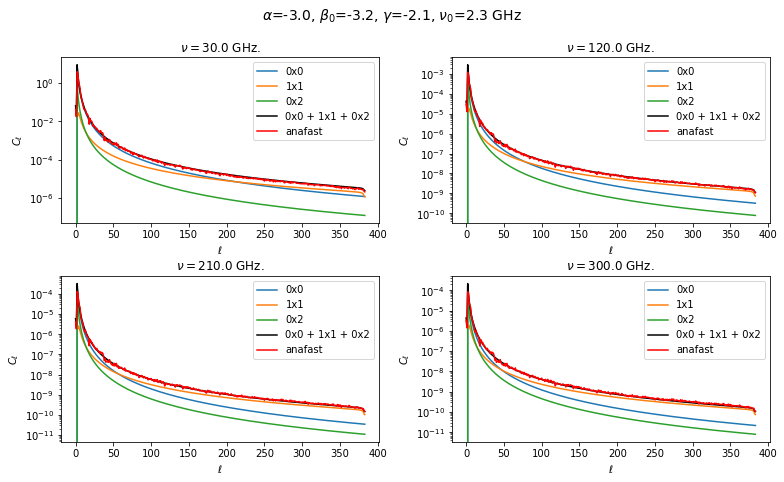

In [44]:
ff.get_plots(freqs)

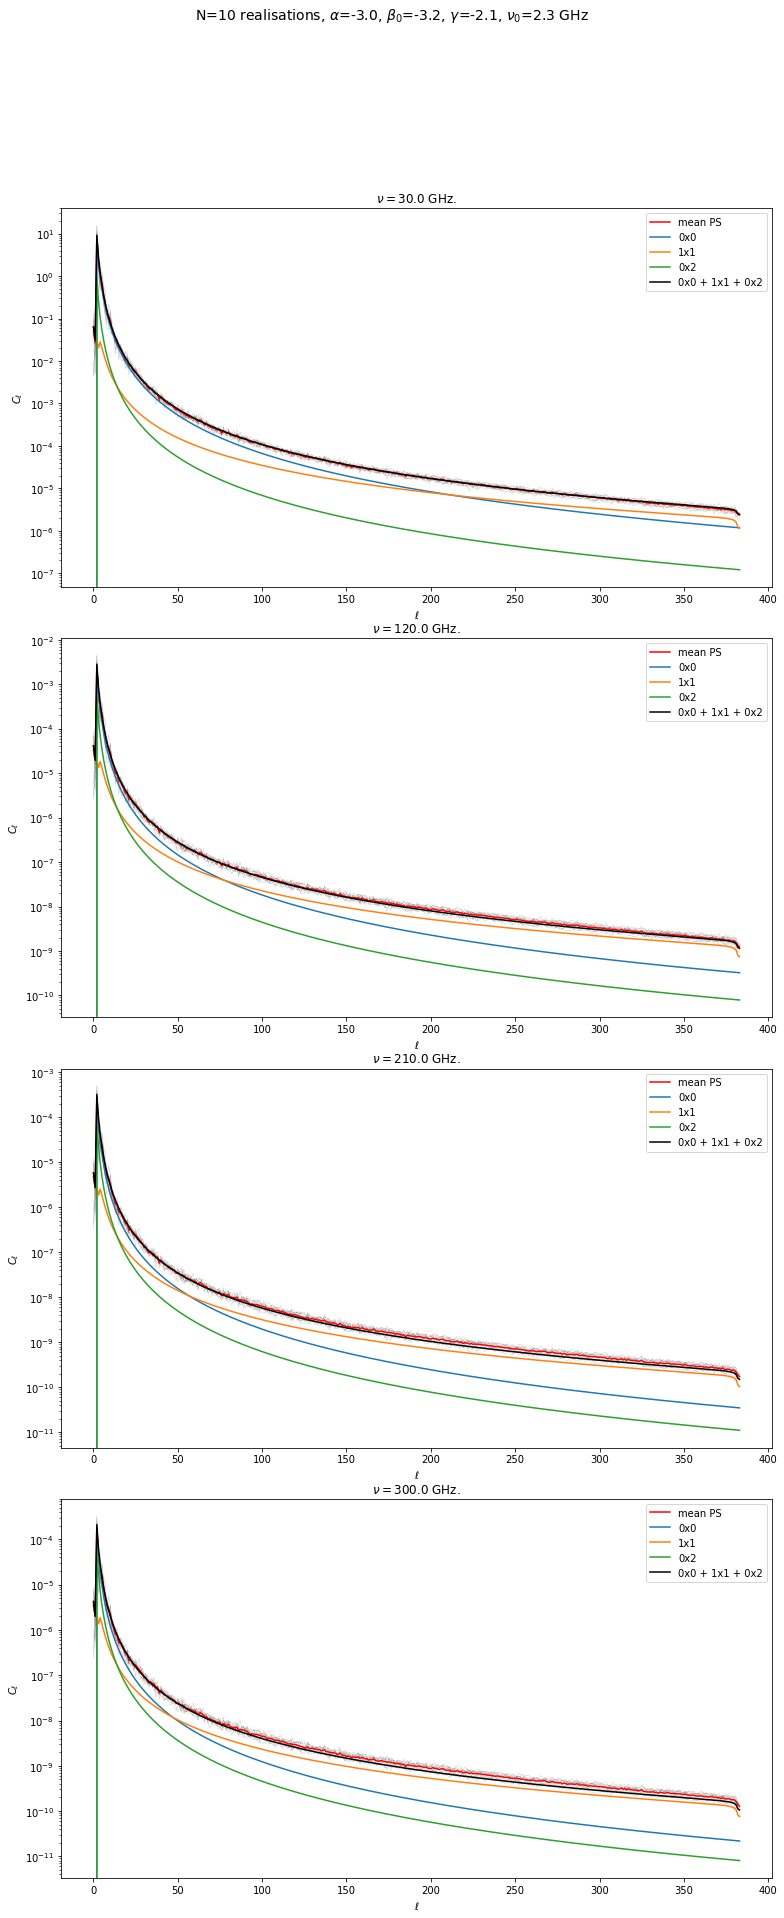

17.157684087753296


In [54]:
start=time.time()
ff.get_plots(freqs, realisation=True)
print(time.time()-start)

In [13]:
#define some different ranges of each parameter

#set of alpha values
alpha = np.linspace(-6., -1., 6)
#set of beta_0 values
beta_0 = np.linspace(-6., -1., 10)
#set of gamma values
gamma = np.linspace(-4., -2.001, 10)
#set nu0 values
nu0 = np.linspace(2.3e9, 100e9, 3)

# Vary $\nu_0$

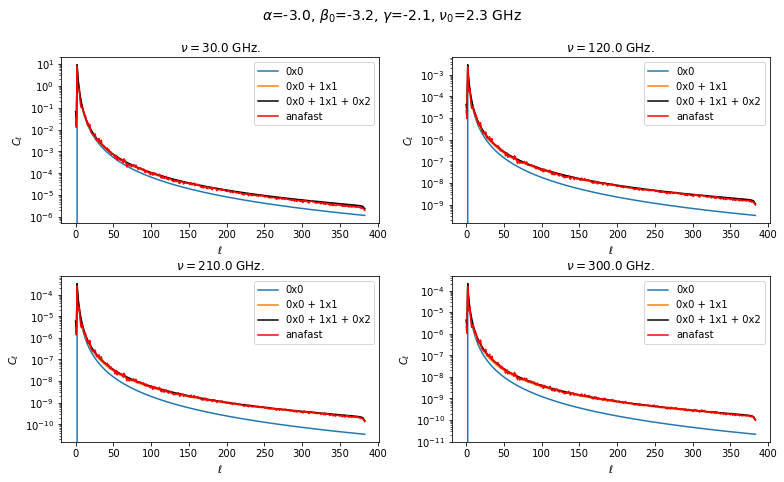

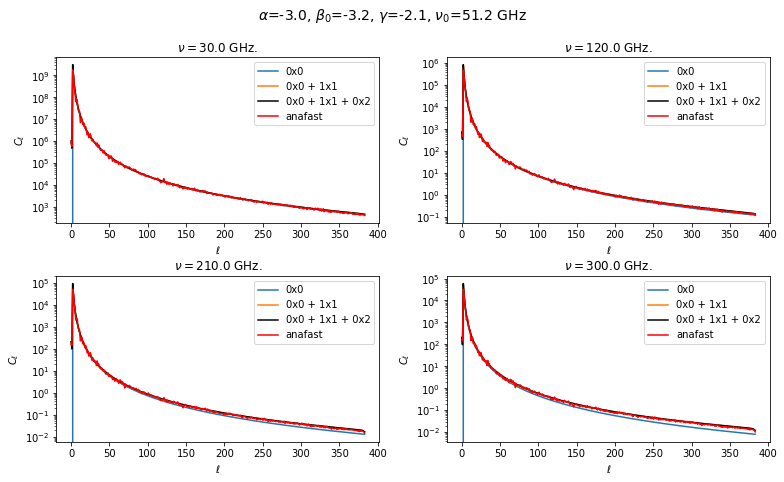

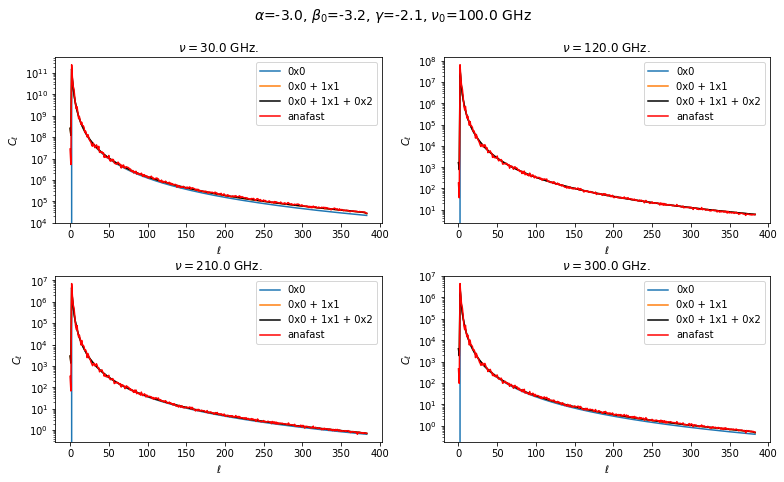

In [7]:
for nu in nu0:
    ff.get_plots(freqs, nu0=nu)

# Vary $\alpha$

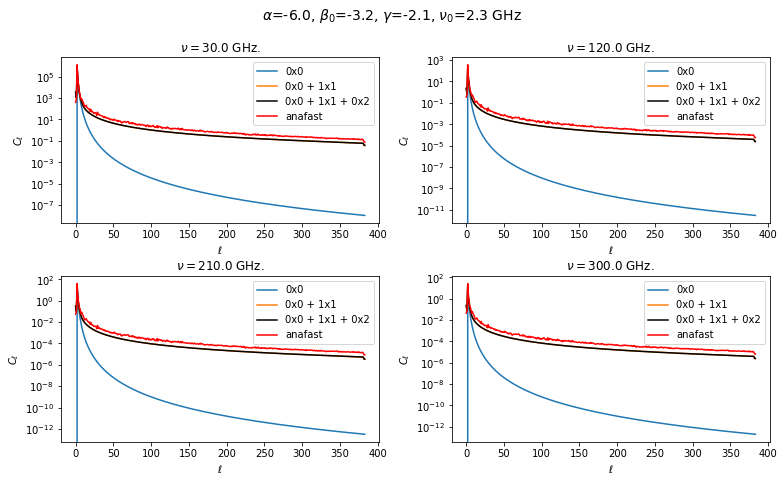

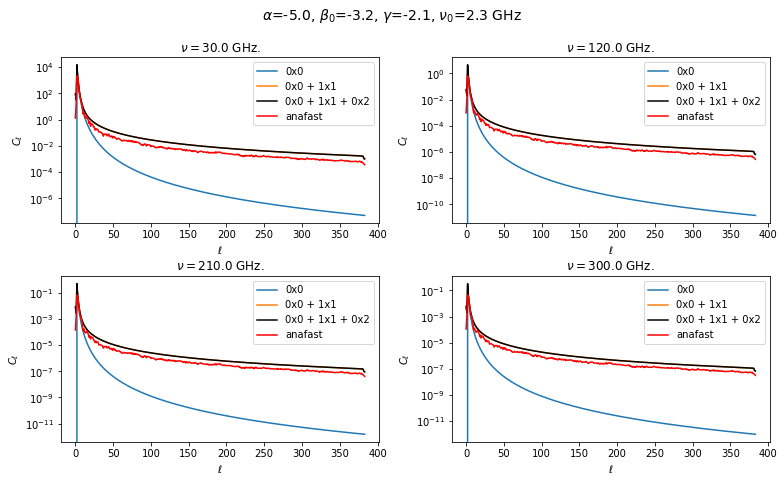

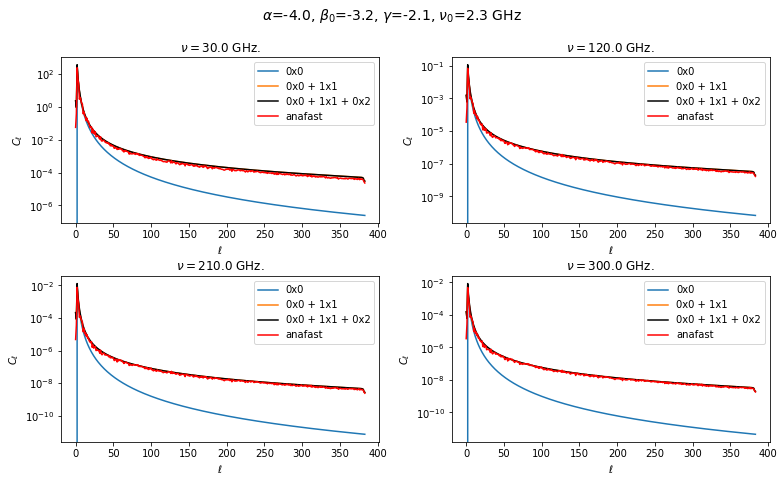

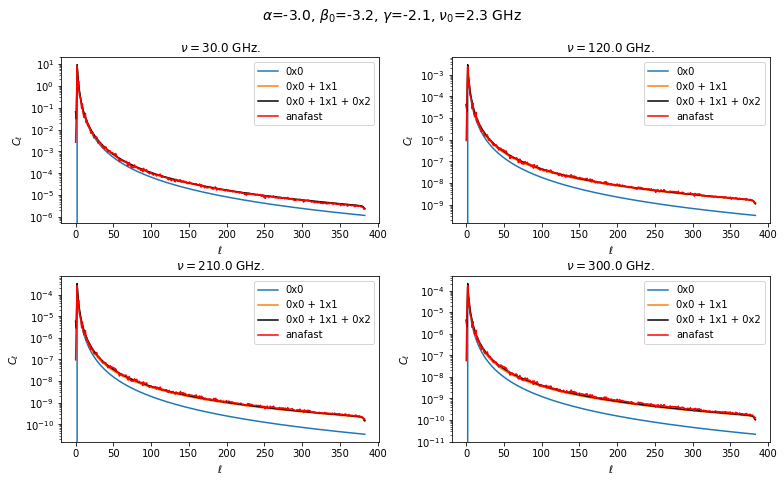

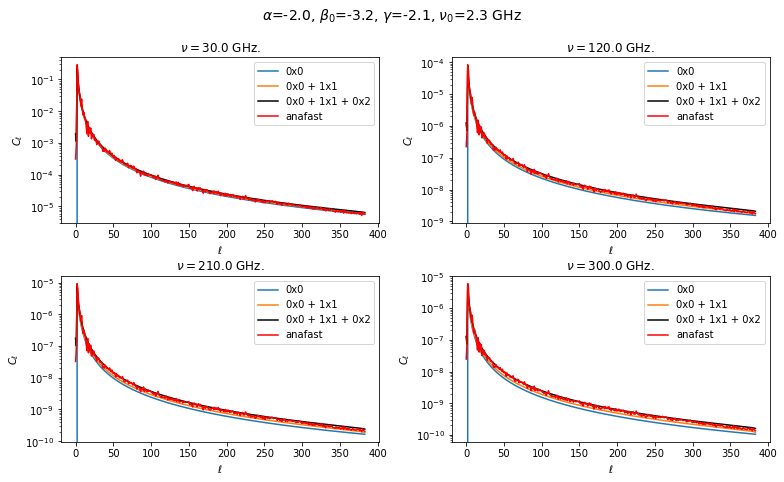

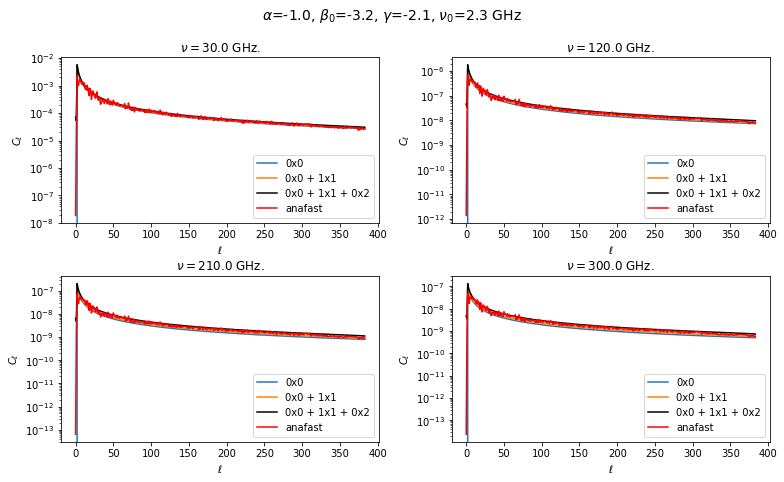

In [8]:
for alpha in alpha:
    ff.get_plots(freqs, alpha=alpha)

# Vary $\beta$

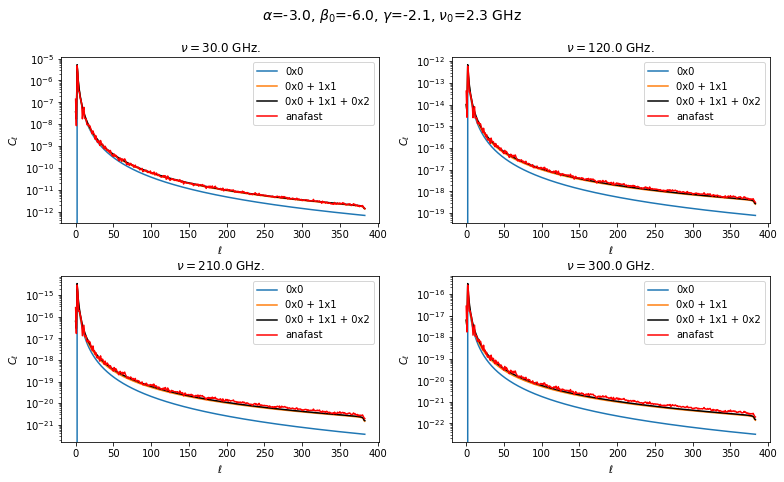

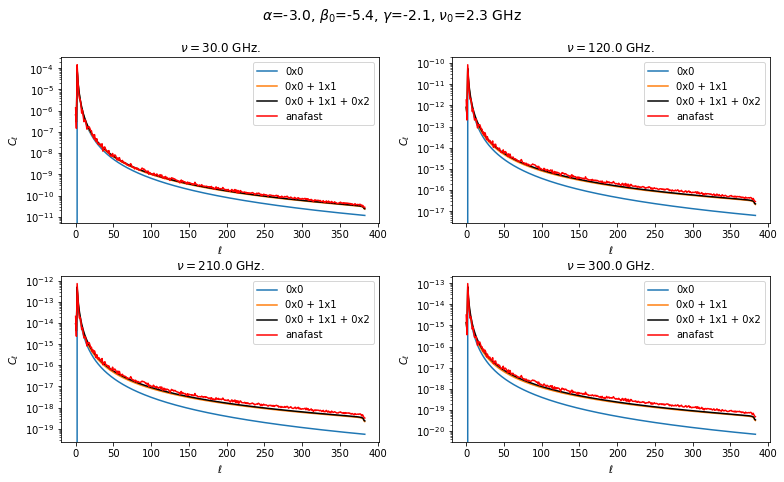

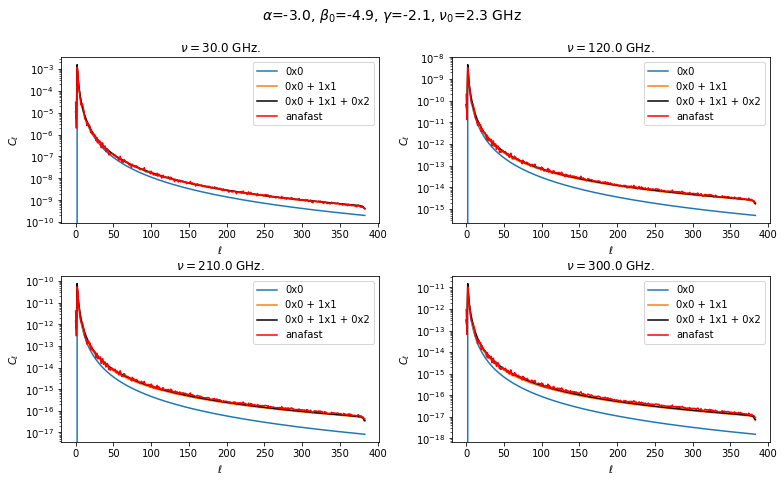

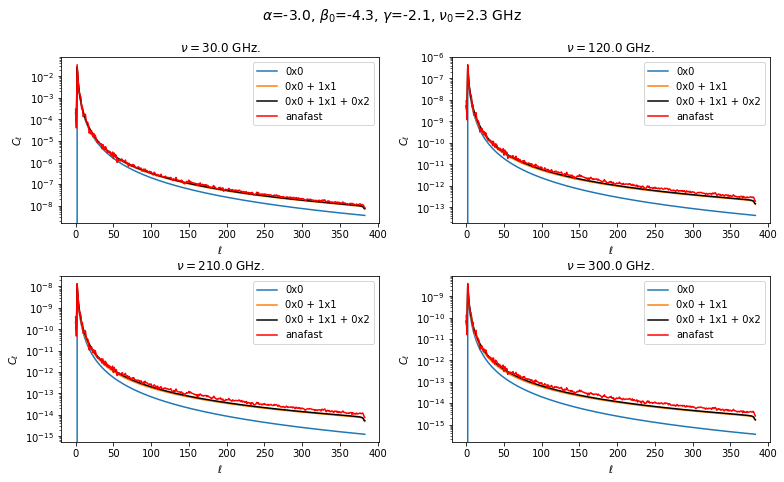

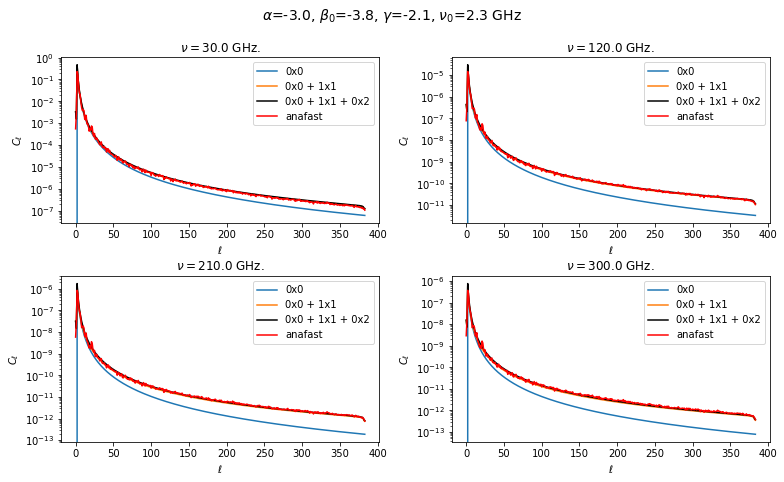

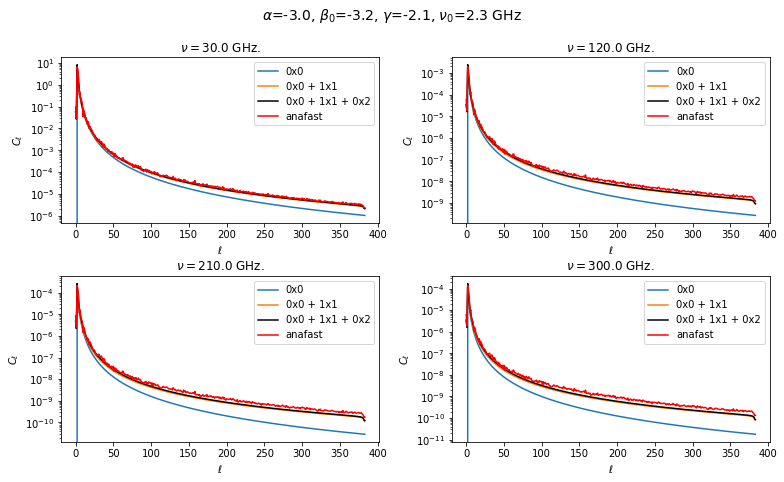

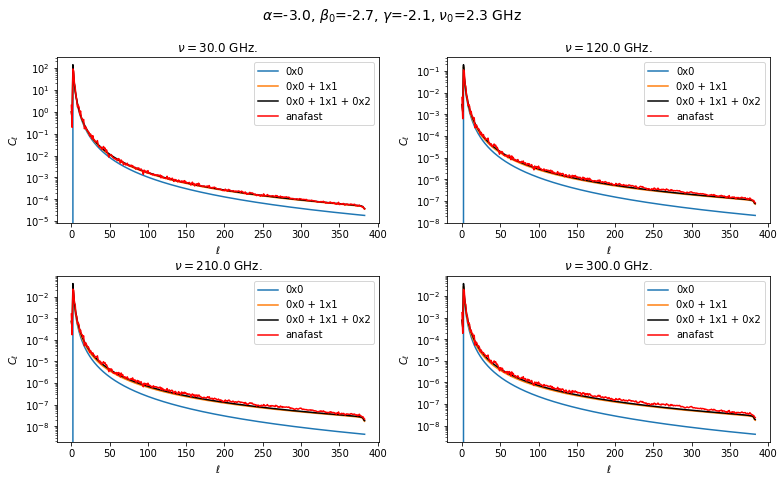

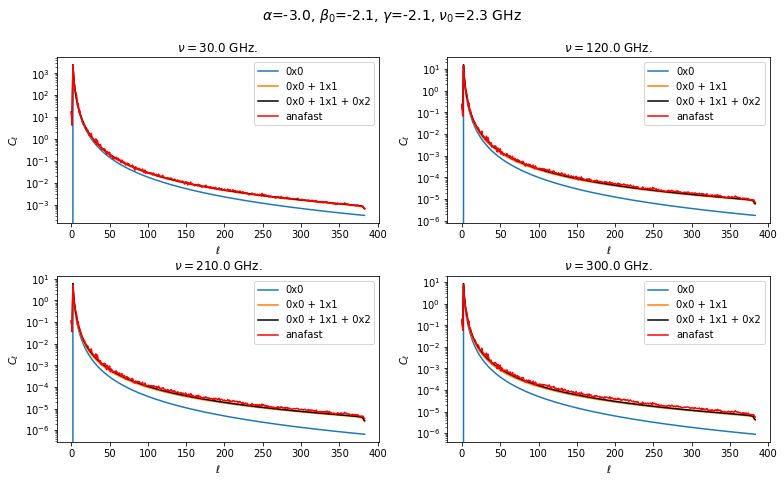

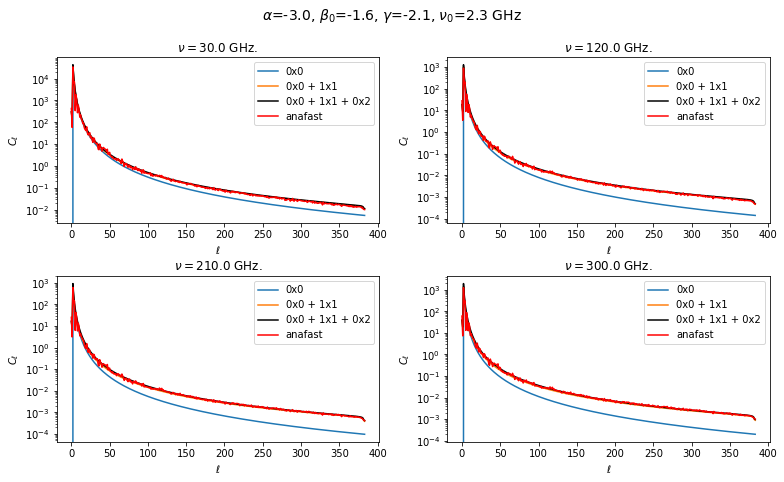

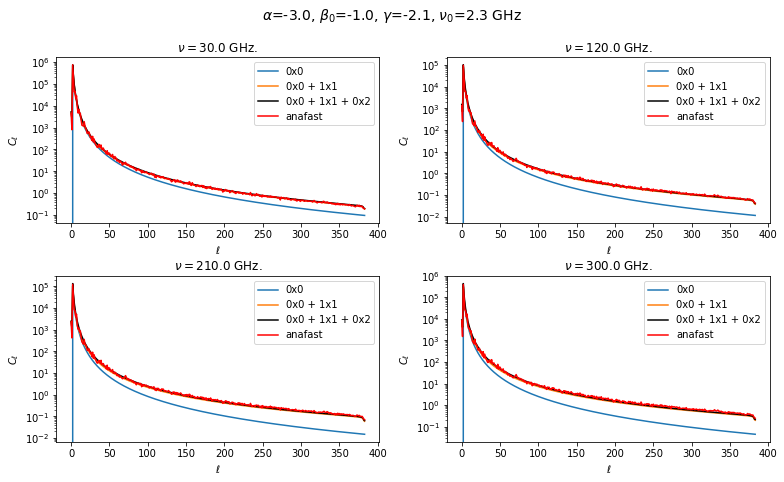

In [9]:
for beta in beta_0:
    ff.get_plots(freqs, beta_0=beta)

# Vary $\gamma$

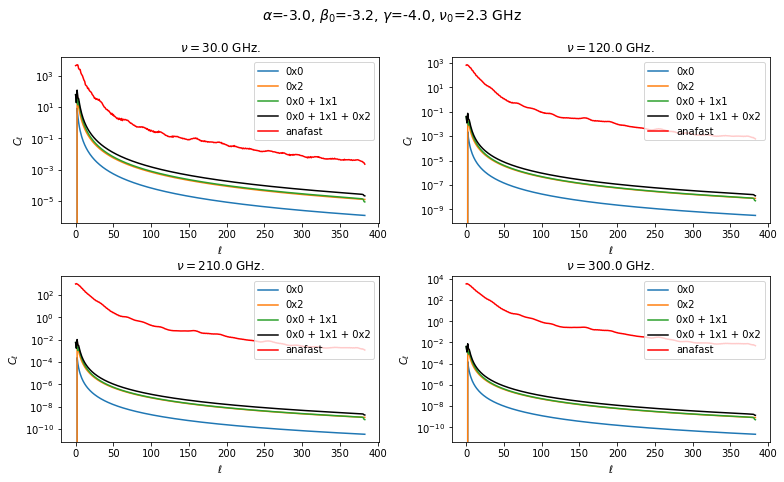

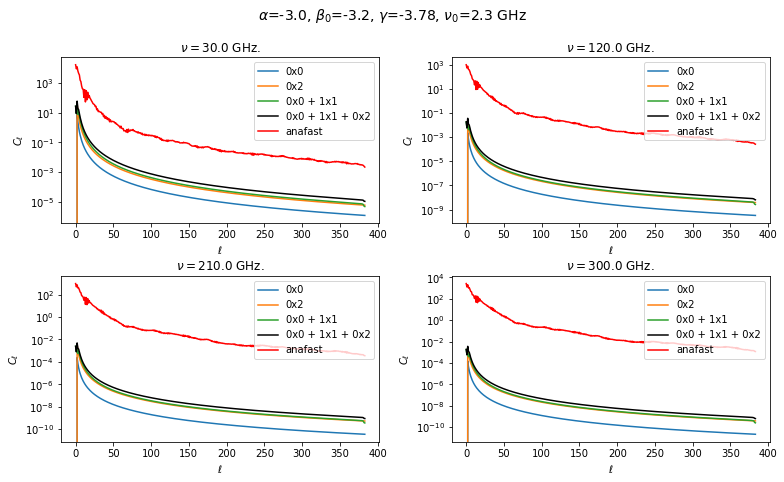

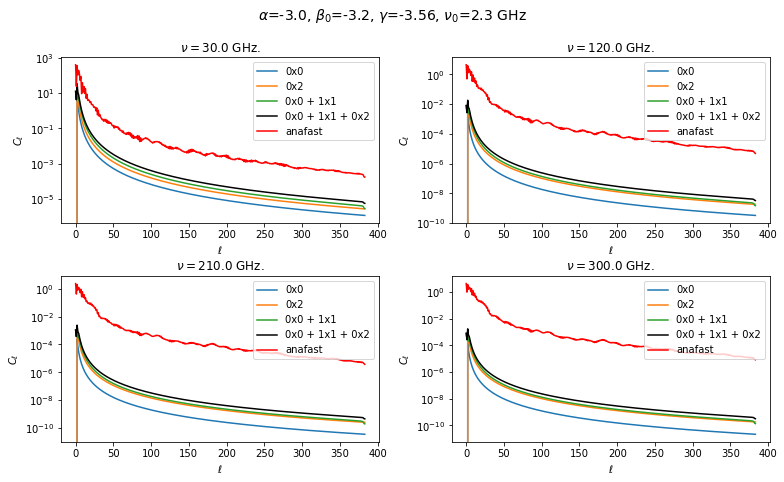

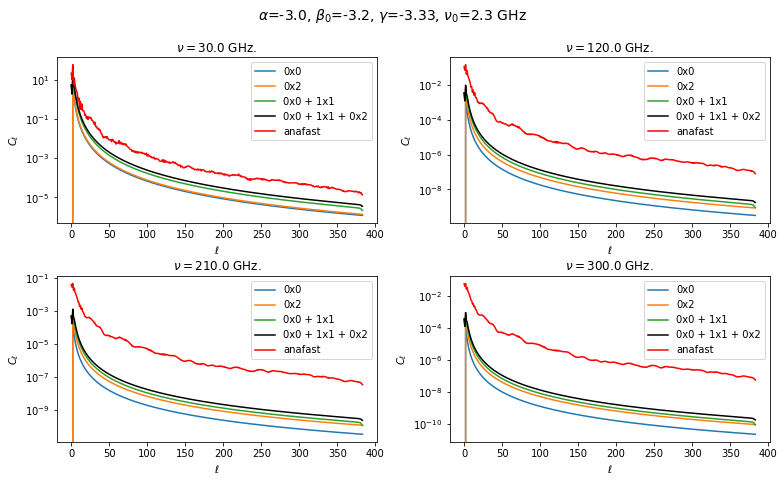

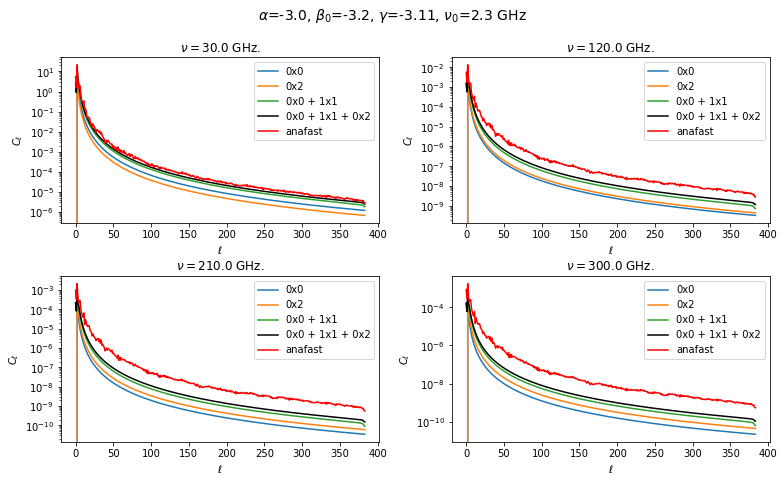

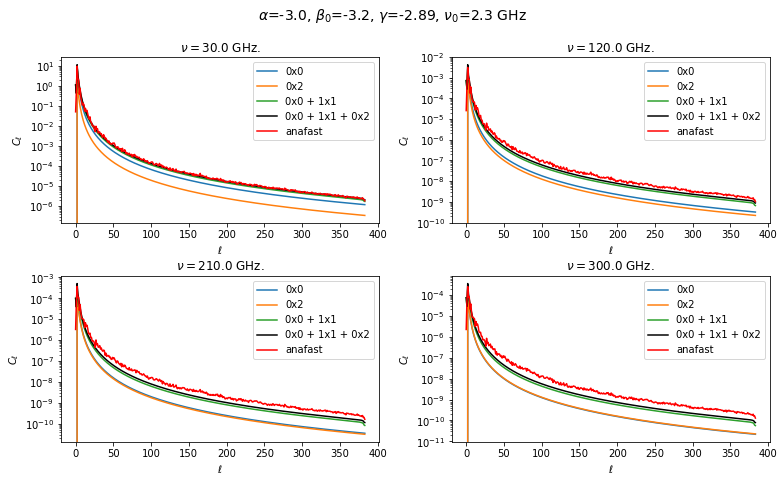

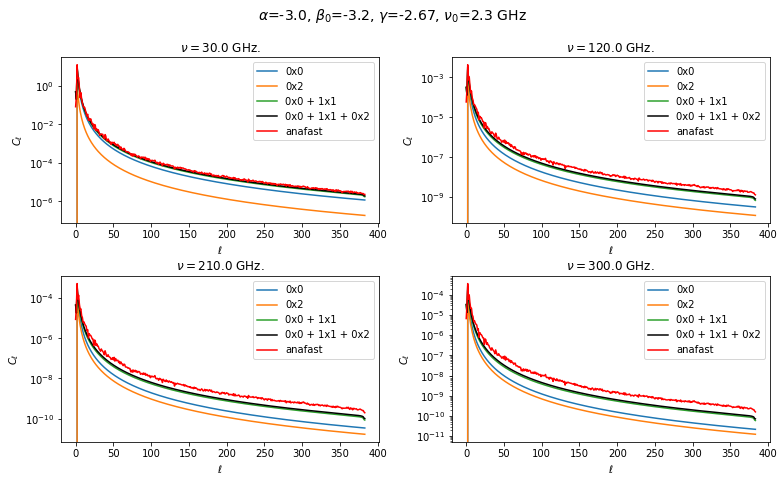

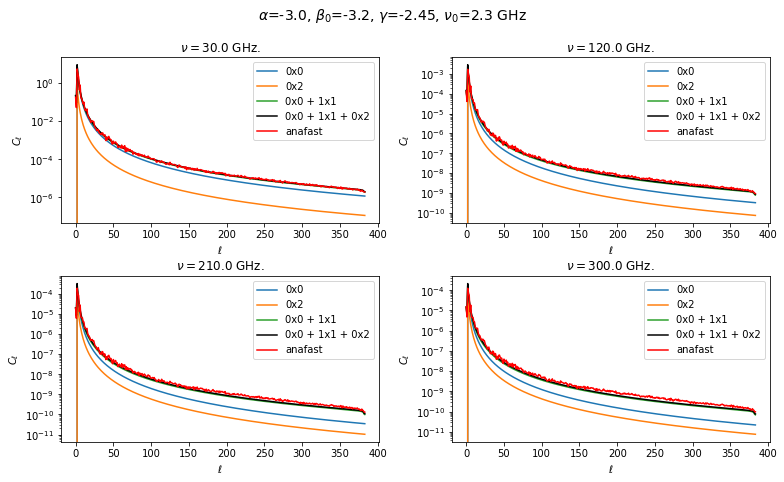

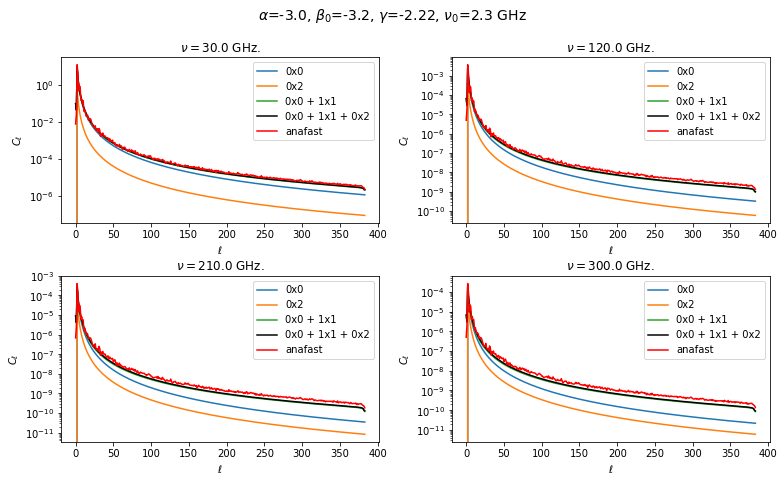

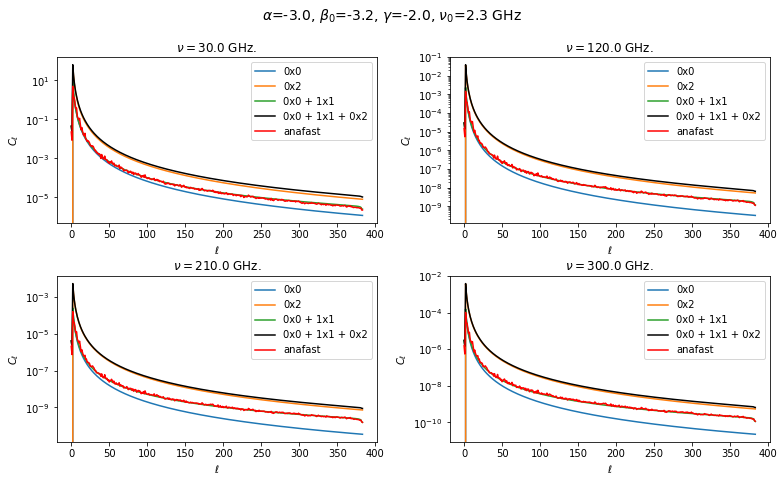

In [9]:
for gamma in gamma:
    ff.get_plots(freqs, gamma=gamma)

In [ ]:
#hmmmmm...

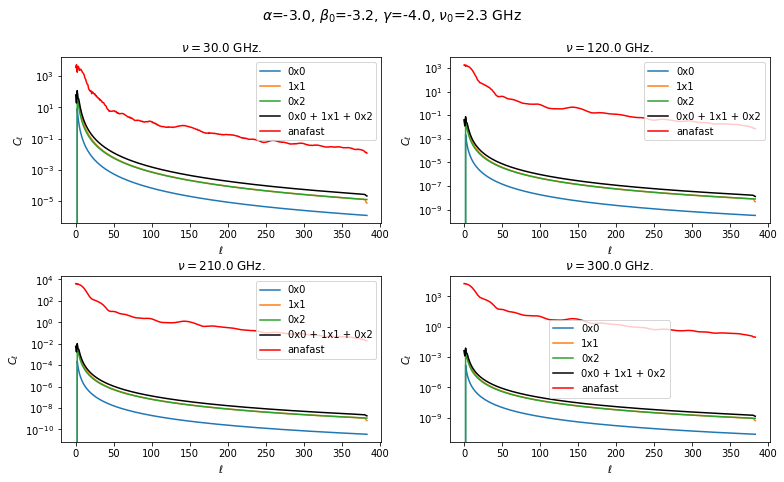

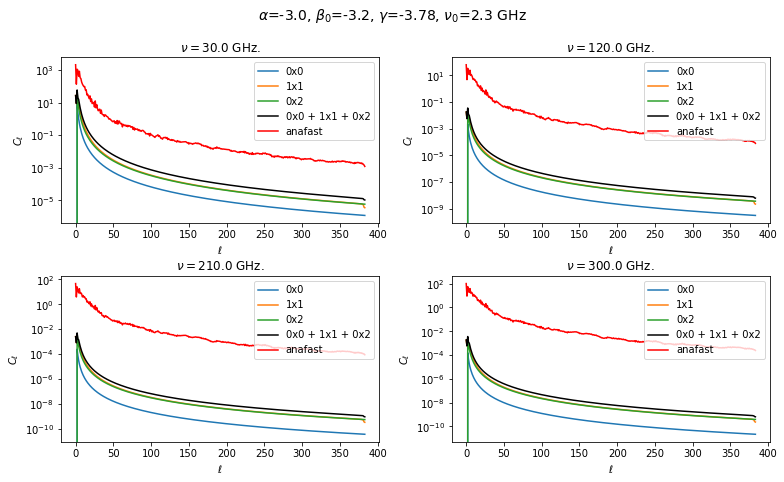

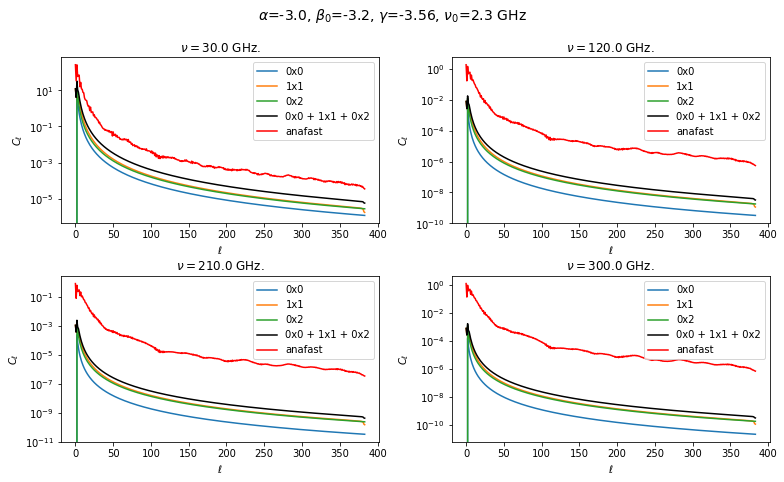

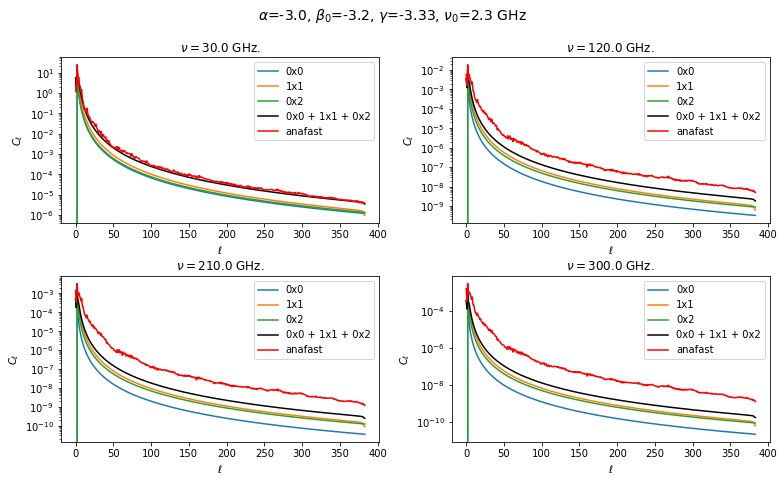

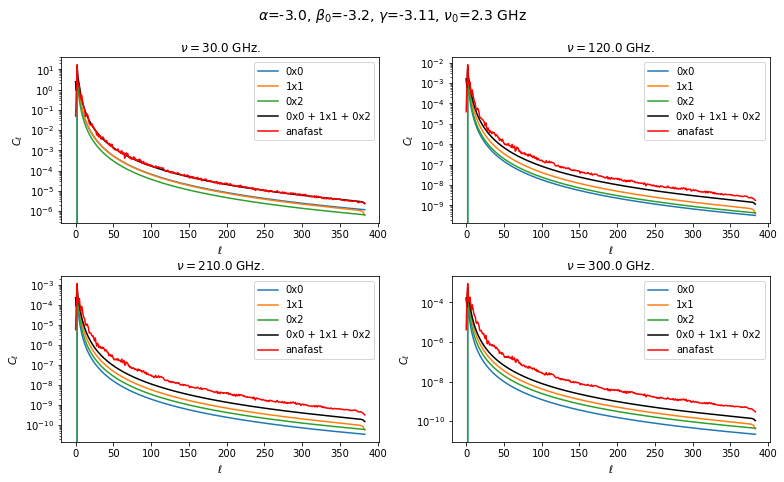

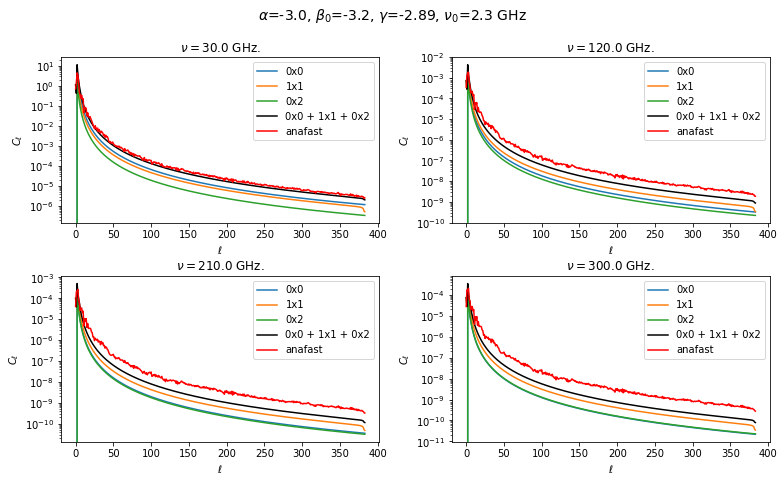

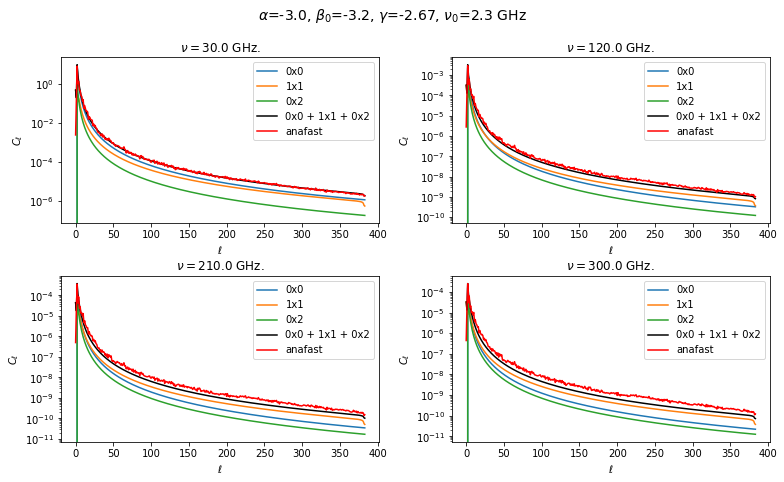

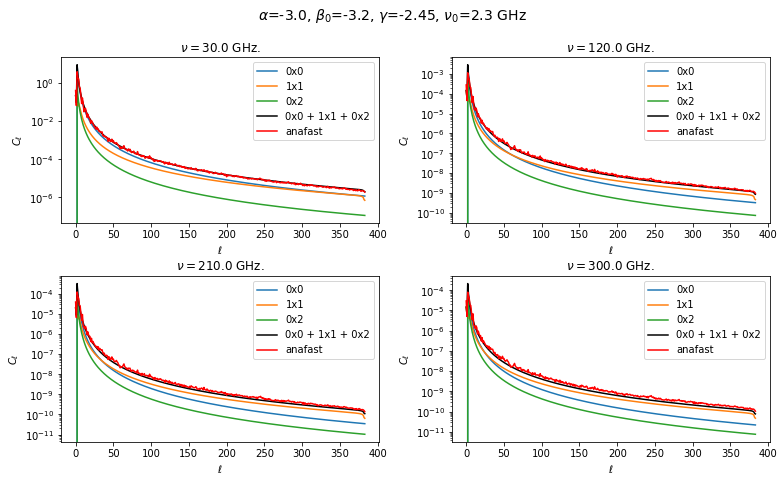

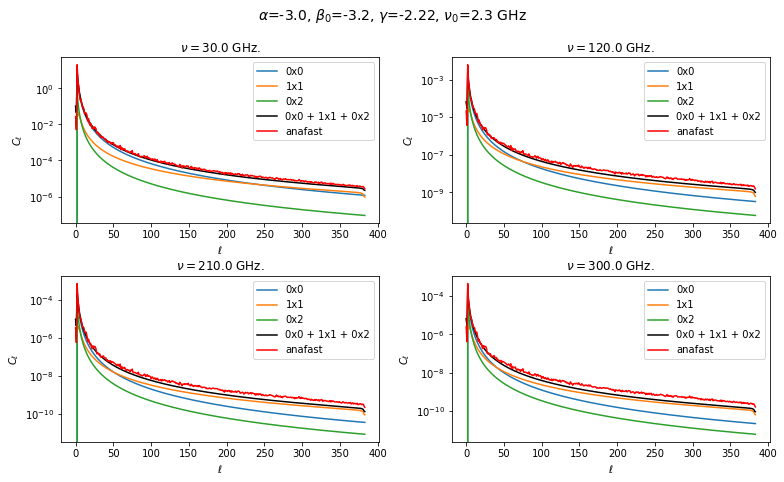

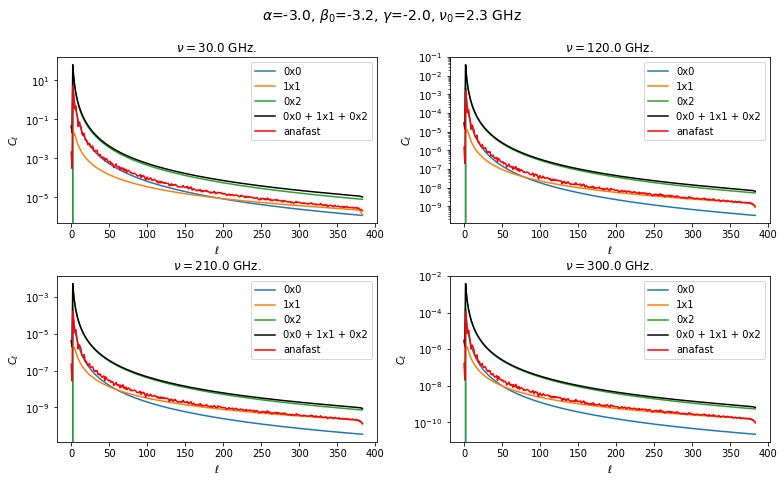

In [14]:
for gamma in gamma:
    ff.get_plots(freqs, gamma=gamma)

In [31]:
%autoreload

In [36]:
N=100
start=time.time()
realisation = ff.realisation_power(N, freqs)
print(time.time()-start)

82.76938390731812


In [33]:
# %lprun -f ff.realisation_power ff.realisation_power(N, freqs)

In [37]:
# %lprun -f ff.map_amp ff.map_amp()

In [38]:
mean_ps = np.mean(realisation, 0)

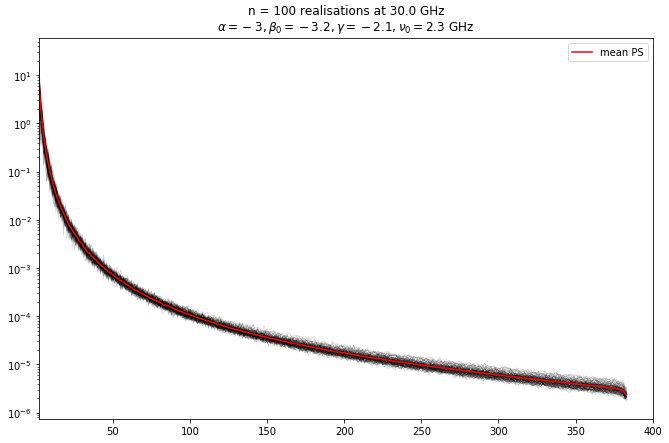

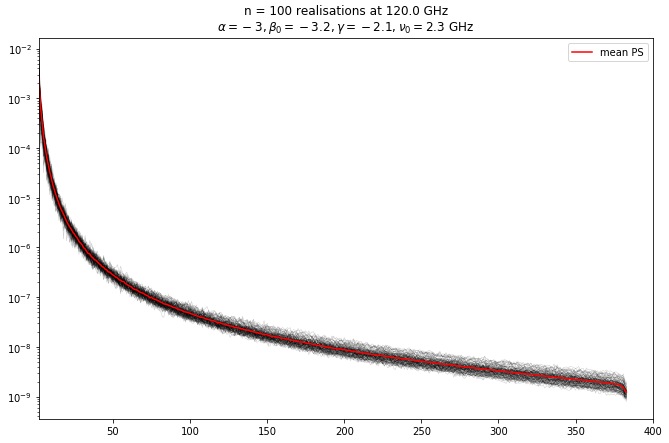

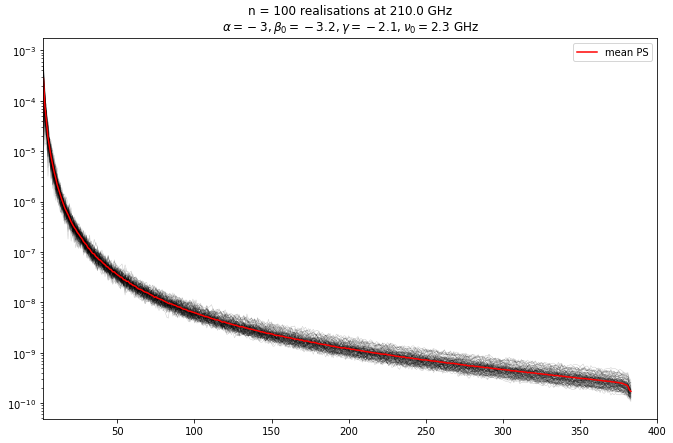

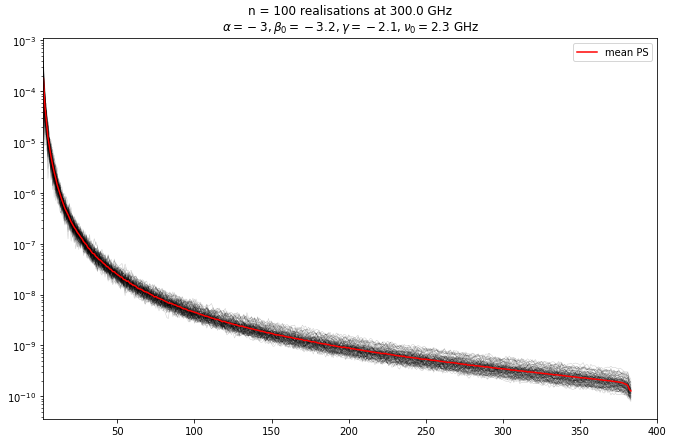

In [43]:
for i in range(len(freqs)):
    figure(figsize=(11,7))
    
    for j in range(N):
        semilogy(realisation[j,:,i], 'k', alpha = 0.2, lw=.5)
        
    semilogy(mean_ps[:,i], 'r', label='mean PS')
    xlim(2,400)
    title('n = ' + str(N) + ' realisations at ' + str(np.round(1e-9*freqs[i])) + ' GHz' +"\n" + r'$\alpha = -3, \beta_0 = -3.2, \gamma=-2.1, \nu_0=2.3 \ \rm GHz$')
    legend();